In [15]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
type(df)

numpy.ndarray

In [18]:
X = df[:, 2]
y = df[:, -1]

In [19]:
X1 = np.c_[np.ones((len(X), 1), dtype='int'), X]
theta1 = np.linalg.inv(X1.T @ X1) @ X1.T @ y
theta1

array([0.12809004, 0.78525187])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape
X_train = np.c_[np.ones((len(X_train), 1), dtype='int'), X_train]
X_test = np.c_[np.ones((len(X_test), 1), dtype='int'), X_test]
X_train

array([[1.        , 0.44153922],
       [1.        , 0.3547114 ],
       [1.        , 0.38085841],
       [1.        , 0.39664529],
       [1.        , 0.38332511],
       [1.        , 0.29748397],
       [1.        , 0.53083374],
       [1.        , 0.42871238],
       [1.        , 0.25949679],
       [1.        , 0.53971386],
       [1.        , 0.71090281],
       [1.        , 0.47705969],
       [1.        , 0.21953626],
       [1.        , 0.88406512],
       [1.        , 0.10804144],
       [1.        , 0.58164776],
       [1.        , 0.37395165],
       [1.        , 0.84065121],
       [1.        , 0.46423286],
       [1.        , 0.73408979],
       [1.        , 0.3300444 ],
       [1.        , 0.32708436],
       [1.        , 0.59003453],
       [1.        , 0.31179082],
       [1.        , 0.42673902],
       [1.        , 0.52244697],
       [1.        , 0.5476073 ],
       [1.        , 0.6576221 ],
       [1.        , 0.48347311],
       [1.        , 0.47952639],
       [1.

In [21]:
def cost_func(theta, X, y):
    m = len(X)
    pred = X.dot(theta)
    cost = (1/m) * np.sum(np.square(pred - y))
    return cost**(1/2)

In [22]:
def gradientDescent(X_train, X_test, y_train, y_test, alpha, epochs):
    m = len(y_train)
    theta = np.zeros(X_train.shape[1]).T
    print(theta)
    rmse_train = np.empty(epochs)
    rmse_test = np.empty(epochs)
    it = np.arange(epochs)
    for i in range(epochs):
        pred = np.dot(X_train, theta)
        theta = theta - (1 / m) * alpha * (X_train.T.dot((pred - y_train)))
        rmse_train[i] = cost_func(theta, X_train, y_train)
        rmse_test[i] = cost_func(theta, X_test, y_test)
    plt.plot(it, rmse_train, c='red', label='Training RMSE')
    plt.plot(it, rmse_test, c='green', label='Testing RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    print(theta)
    return theta, rmse_train, rmse_test

[0. 0.]


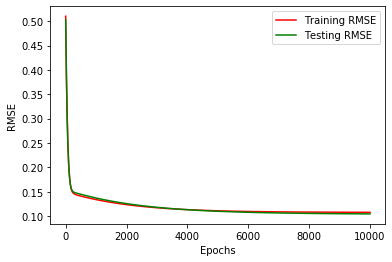

[0.15714049 0.72619958]


In [23]:
theta, rmse_train, rmse_test = gradientDescent(X_train, X_test, y_train, y_test, 0.01, 10000)

In [24]:
X_train = X_train[:, 1]


In [25]:
theta, rmse_train

(array([0.15714049, 0.72619958]),
 array([0.51006147, 0.50441771, 0.49884804, ..., 0.10760463, 0.10760451,
        0.10760439]))

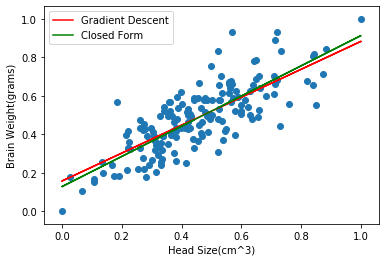

In [26]:
plt.scatter(X_train, y_train)
y_pred1 = theta1[0] + theta1[1] * X_train
y_pred = theta[0] + theta[1] * X_train
plt.plot(X_train, y_pred, label='Gradient Descent', c='red')
plt.plot(X_train, y_pred1, c='green', label='Closed Form')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()